# The Most Profitable Prepaid Plan

Megaline Telecom offers its clients two prepaid plans, Surf and Ultimate. The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.

## Table of Contents

* [Introduction](#Introduction)
* [Data Pre-Processing](#Data-Pre-Processing)
* [Data Analysis](#Data-Analysis)
* [Hypothesis Testing](#Hypothesis-Testing)

## Introduction

This project will analyze a dataset containing information on 500 users of Megaline telecommunications services in 2018. The telecommunications services provided include calls, short messages (SMS), and internet which are packaged in two types of prepaid plans, namely surf and ultimate.

### Objectives

The objectives of this project were to:
* Study the behavior of prepaid plan users.
* Determine which type of plan brings more revenue.
* Examine whether the average revenue of Ultimate and Surf phone plan users is different.
* Examine whether the average income of users in the NY-NJ area differs from the income of users from other regions.

### Steps

There are five datasets used in this project. The dataset containing service usage is found in `calls`, `messages`, and `internet`. The other two datasets are `users` which contains client information, and `plans` which contains information about prepaid packages and tariffs.

This project will consist of the following steps:
* Data pre-processing
* Data analysis
* Hypothesis testing

[Back to Table of Contents](#Table-of-Contents)

## Data Pre-Processing

### Load Libraries

In [70]:
# Loading the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy
from scipy import stats as st

### Load Data

In [71]:
# Loading datasets
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

except:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')


### Data Exploration 

#### Checking `plans` dataset

In [72]:
# Displaying information from `plans` dataset
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [73]:
# Displaying plans dataset
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The `plans` dataset contains the detailed information for each type of plans.

#### Checking `users` dataset

In [74]:
# Displaying the first 10 rows of `users` dataset.
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [75]:
# Displaying information from `users` dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [76]:
# Displaying the statistical summary of `users` dataset
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


From initial review of the dataset:
* There are a total of 500 customers in this dataset, 34 of whom have stopped using the service.
* The data type of `reg_date` needs to be changed to datetime.
* The youngest customer in the dataset is 18 years old.
* The oldest customer in the dataset is 75 years old.

In [77]:
# Creating a copy of the dataset for editing purpose
df = users.copy()

In [78]:
# Changing `reg_date` datatype to datetime.
df['reg_date']=pd.to_datetime(df['reg_date'],format='%Y-%m-%d')

In [79]:
# Checking unique values in column `plan` 
users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

There are only two prepaid plans, i.e., surf and ultimate.

In [80]:
# Checking unique values in column `city`
sorted(users['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

There are no duplicate entries in the column `city`. For simpler grouping, we will only have to create a new column containing only the state names.

In [81]:
# Adding new column `state`
df['state'] = df['city'].str.rsplit(', ').str[-1].str[:-4]
df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ-PA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,LA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,CA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ-PA


#### Checking `calls` dataset

In [82]:
# Displaying the first 10 rows of `calls` dataset
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [83]:
# Displaying information from `calls` dataset
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


There are no missing values in this dataset. We will only have to change the data type of the `call_date` column from object to datetime.

In [84]:
# Converting data type of column `call_date` from object to datetime
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

In [85]:
# Displaying statistical summary of the `calls` dataset 
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


The minimum duration value of 0 might indicate missed or cancelled calls.

In [86]:
# Checking rows with `duration` value of 0
calls[calls['duration']==0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [87]:
# Calculating percentage of phonecalls with duration of 0.
len(calls[calls['duration']==0])/len(calls)*100

19.482339274694162

Zero-duration data makes up 19.48% of the entire dataset. These rows will still be used.

In [88]:
# Memeriksa jumlah nilai unik pada `user_id`
len(calls['user_id'].unique())

481

There are 481 customers using the phone call service.

In [89]:
# Checking for duplicates
calls.duplicated().sum()

0

No duplicates were found in this dataset.

#### Checking `messages` dataset

In [90]:
# Displaying the first 10 rows of `messages` dataset
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [91]:
# Displaying information from `messages` dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


There are no missing values in this dataset. We only need to change the data type of the column `message_date` from object to datetime.

In [92]:
# Changing the data type of column `message_date` to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

In [93]:
# Checking the number of unique values in column `user_id`
len(messages['user_id'].unique())

402

There were 402 customers using the short message service (SMS).

In [94]:
# Checking for duplicates
messages.duplicated().sum()

0

No duplicates were found in this dataset.

#### Checking `internet` dataset

In [95]:
# Displaying the first 10 row of internet dataset
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [96]:
# Displaying the statistical summary of internet dataset
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


There were 0 values in column `mb_used`. We are going to check these rows.

In [97]:
# Checking rows containing 0 in column`mb_used`.
internet[internet['mb_used']==0]

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


In [98]:
# Calculate percentage of 0 values in column `mb_used`
len(internet[internet['mb_used']==0])/len(internet)*100

13.11423801574052

There were 13.11% of data rows containing 0 values in column `mb_used`. 

In [99]:
# Checking information from internet dataset
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


There were no missing value in this dataset. We will only have to change the data type of column `session_date` from object to datetime.

In [100]:
# Changing the data type in column `session_date` to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [101]:
# Checking the amount of unique values in column `user_id`
len(internet['user_id'].unique())

489

There were 489 customers using the internet service.

In [102]:
# Checking for duplicates
internet.duplicated().sum()

0

No duplicates were found in this dataset.

### Inserting additional columns

For each user, we are going to find:
* Number of calls made
* Call minutes used per month
* Number of SMS sent per month
* Data volume per month
* Monthly income of each user (subtract the free package limit from the total number of calls, SMS, and data; multiply the result by the value of the plan; add monthly fees depending on the plan)

#### Calculating the duration and number of phonecalls per month

In [103]:
# Creating new column `year_month`
calls['year_month']= calls['call_date'].dt.to_period('M')
calls

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11
137731,1499_200,1499,2018-10-20,10.89,2018-10
137732,1499_201,1499,2018-09-21,8.12,2018-09
137733,1499_202,1499,2018-10-10,0.37,2018-10


In [104]:
#  Calculating the duration and number of phonecalls made per month
call_monthly = calls.pivot_table(index=['user_id','year_month'], values = 'duration', aggfunc=['count', 'sum'])

# Changing the column name
call_monthly.columns=['call_count', 'total_duration']

# Reseting index
call_monthly = call_monthly.reset_index()

# Rounding up values in `total_duration`
call_monthly['total_duration']=call_monthly['total_duration'].apply(np.ceil).astype('int')

call_monthly

,user_id,year_month,call_count,total_duration
0,1000,2018-12,16,117
1,1001,2018-08,27,172
2,1001,2018-09,49,298
3,1001,2018-10,65,375
4,1001,2018-11,64,405
...,...,...,...,...
2253,1498,2018-12,39,325
2254,1499,2018-09,41,331
2255,1499,2018-10,53,364
2256,1499,2018-11,45,289


#### Calculating the number of SMS per month

In [105]:
# Creating new column `year_month`
messages['year_month']= messages['message_date'].dt.to_period('M')
messages

,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12


In [106]:
# Calculating number of SMS per month
message_monthly = messages.pivot_table(index=['user_id','year_month'], values = 'id', aggfunc=['count'])

# Changing column name
message_monthly.columns=['sms_count']

# Reseting index
message_monthly = message_monthly.reset_index()

message_monthly

,user_id,year_month,sms_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


#### Calculating the data volume (MB) per month

In [107]:
# Adding new column `year_month`
internet['year_month']= internet['session_date'].dt.to_period('M')
internet

,id,user_id,session_date,mb_used,year_month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12


In [108]:
# Calculating the amount of data volume (MB) used per month
inet_monthly = internet.pivot_table(index=['user_id','year_month'], values = 'mb_used', aggfunc=['sum'])

# Changing column name
inet_monthly.columns=['total_mb']

# Reseting index
inet_monthly = inet_monthly.reset_index()

inet_monthly

,user_id,year_month,total_mb
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


#### Merging the tables

In [109]:
# Merge dataset call_monthly with message monthly
df_merged =  call_monthly.merge(message_monthly, how='outer') 

# Merge df_merged with internet monthly
df_merged = df_merged.merge(inet_monthly, how='outer')

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb
0,1000,2018-12,16.0,117.0,11.0,1901.47
1,1001,2018-08,27.0,172.0,30.0,6919.15
2,1001,2018-09,49.0,298.0,44.0,13314.82
3,1001,2018-10,65.0,375.0,53.0,22330.49
4,1001,2018-11,64.0,405.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91
2289,1361,2018-05,NaN,NaN,2.0,1519.69
2290,1482,2018-10,NaN,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,NaN,233.17


In [110]:
# Create new dataset from df dataset by taking only column `user_id` and `plan`
plan = df[['user_id','plan']]

# Add a column containing type of plan for each user using merge
df_merged = df_merged.merge(plan, on='user_id', how='inner')

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf


In [111]:
# Create new dataset from df dataset by taking only column `user_id` and `state`
state = df[['user_id','state']]

# Add new column containing state name of each user using merge
df_merged = df_merged.merge(state, on='user_id', how='inner')
df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA
...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH


We have just created a dataset containing the usage of all services (call, SMS, and internet), type of plans, and state code for each user.

#### Calculating duration and additional costs of phone calls

In [112]:
# Displaying plans dataset
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [113]:
# Calculating additional call duration for surf and ultimate plan users
df_merged['add_duration'] =(df_merged['total_duration']-500).where(cond= df_merged['plan']=="surf", other = df_merged['total_duration']-3000)

# Replacing negative values with 0
df_merged.loc[df_merged['add_duration']<0,'add_duration'] = 0 

# Replacing null values with 0
df_merged.loc[df_merged['add_duration'].isna(),'add_duration'] = 0 

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0
...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0


In [114]:
# Calculating additional call cost based on the type of plans
df_merged['add_call_cost'] =(df_merged['add_duration']*0.03).where(cond= df_merged['plan']=="surf", other = df_merged['add_duration']*0.01)

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0


#### Calculating additional cost from SMS

In [115]:
# Calculating number of additional SMS for each plan
df_merged['add_sms'] =(df_merged['sms_count']-50).where(cond= df_merged['plan']=="surf", other = df_merged['sms_count']-1000)

# Replace negative values with 0
df_merged.loc[df_merged['add_sms']<0,'add_sms'] = 0

# Replace null values with 0
df_merged.loc[df_merged['add_sms'].isna(),'add_sms']=0

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0


In [116]:
# Calculating additional SMS cost based on type of plans
df_merged['add_sms_cost'] =(df_merged['add_sms']*0.03).where(cond= df_merged['plan']=="surf", other = df_merged['add_sms']*0.01)

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33


#### Calculating additional cost from data volume

In [117]:
# Calcuating additional data volume (GB) based on plan types
df_merged['add_mb'] =(df_merged['total_mb']-15360).where(cond= df_merged['plan']=="surf", other = df_merged['total_mb']-30720)

# Replace negative values with 0
df_merged.loc[df_merged['add_mb']<0,'add_mb'] = 0 

# Replace null values with 0
df_merged.loc[df_merged['add_mb'].isna(),'add_mb']=0

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00


In [118]:
# Convert additional data volume from MB to GB and round it up
df_merged['add_gb'] = (df_merged['add_mb']/1024).apply(np.ceil)
df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00,0.0
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49,7.0
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05,6.0
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00,0.0
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26,2.0
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00,0.0


In [119]:
# Calculating additional data cost based on plan types.
df_merged['add_data_cost'] =(df_merged['add_gb']*10).where(cond= df_merged['plan']=="surf", other = df_merged['add_gb']*7)

df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb,add_data_cost
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00,0.0,0.0
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49,7.0,70.0
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30,4.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05,6.0,42.0
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00,0.0,0.0
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26,2.0,20.0
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00,0.0,0.0


#### Calculating total additional cost per month for each user

In [120]:
# Adding up additional costs per month
df_merged['total_add_cost'] = df_merged['add_call_cost']+df_merged['add_sms_cost']+df_merged['add_data_cost']
df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb,add_data_cost,total_add_cost
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49,7.0,70.0,70.09
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30,4.0,40.0,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05,6.0,42.0,42.00
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00,0.0,0.0,0.78
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26,2.0,20.0,20.66
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00,0.0,0.0,0.33


#### Calculating the total revenue per month from each user

In [121]:
# Adding a column containing the monthly fee according to the plan type.
def price(row):
    if 'surf' in row:
        return 20
    else:
        return 70

df_merged['monthly_price'] = df_merged['plan'].apply(price)
df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb,add_data_cost,total_add_cost,monthly_price
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,70
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,20
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,20
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49,7.0,70.0,70.09,20
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30,4.0,40.0,40.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05,6.0,42.0,42.00,70
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00,0.0,0.0,0.78,20
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26,2.0,20.0,20.66,20
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00,0.0,0.0,0.33,20


In [122]:
# Calculate the total revenue per month
df_merged['total_revenue'] = df_merged['total_add_cost'] + df_merged['monthly_price']
df_merged

,user_id,year_month,call_count,total_duration,sms_count,total_mb,plan,state,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb,add_data_cost,total_add_cost,monthly_price,total_revenue
0,1000,2018-12,16.0,117.0,11.0,1901.47,ultimate,GA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,70,70.00
1,1001,2018-08,27.0,172.0,30.0,6919.15,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,20,20.00
2,1001,2018-09,49.0,298.0,44.0,13314.82,surf,WA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,20,20.00
3,1001,2018-10,65.0,375.0,53.0,22330.49,surf,WA,0.0,0.0,3.0,0.09,6970.49,7.0,70.0,70.09,20,90.09
4,1001,2018-11,64.0,405.0,36.0,18504.30,surf,WA,0.0,0.0,0.0,0.00,3144.30,4.0,40.0,40.00,20,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,NaN,78.0,36730.05,ultimate,IL-IN-WI,0.0,0.0,0.0,0.00,6010.05,6.0,42.0,42.00,70,112.00
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,MA-NH,0.0,0.0,26.0,0.78,0.00,0.0,0.0,0.78,20,20.78
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,MA-NH,0.0,0.0,22.0,0.66,1768.26,2.0,20.0,20.66,20,40.66
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,MA-NH,0.0,0.0,11.0,0.33,0.00,0.0,0.0,0.33,20,20.33


## Data Analysis

### Calculating the mean, median, variance, and standard deviation

In [123]:
# Create a function to calculate average, median, variance, and standard deviation based on plan type.
def calc(data, column):
    surf_mean = data.loc[data['plan']=='surf'][column].mean().round(1)
    surf_median = data.loc[data['plan']=='surf'][column].median().round(1)
    surf_var = np.var(data.loc[data['plan']=='surf'][column]).round(1)
    surf_std = np.std(data.loc[data['plan']=='surf'][column]).round(1)
    
    ulti_mean = data.loc[data['plan']=='ultimate'][column].mean().round(1)
    ulti_median = data.loc[data['plan']=='ultimate'][column].median().round(1)
    ulti_var = np.var(data.loc[data['plan']=='ultimate'][column]).round(1)
    ulti_std = np.std(data.loc[data['plan']=='ultimate'][column]).round(1)

    # Store results in a dictionary
    result = {'type':['surf', 'ultimate'],
           'mean':[surf_mean, ulti_mean],
           'median':[surf_median, ulti_median],
           'variance':[surf_var, ulti_var],
           'stdev': [surf_std, ulti_std]
           }
    
    # Create a results table
    result_table = pd.DataFrame(result)
    
    return result_table

In [124]:
# Calculates the average, median, variance, and standard deviation for the total call duration per month
calc(df_merged,'total_duration')

,type,mean,median,variance,stdev
0,surf,412.6,406.0,46972.6,216.7
1,ultimate,410.7,400.0,50446.4,224.6


Call durations on surf and ultimate data packet types have average, median, variance, and stdev that are almost close to each other.

In [125]:
# Calculates the average, median, variance and standard deviation for the total SMS per month
calc(df_merged,'sms_count')

,type,mean,median,variance,stdev
0,surf,40.1,32.0,1090.5,33.0
1,ultimate,46.3,41.0,1083.3,32.9


The number of SMS on surf and ultimate data package types has a fairly similar average, median, variance, and stdev. Ultimate users send more SMS, with an average of 46.

In [126]:
# Calculates the average, median, variance, and standard deviation for the total data (MB) per month
calc(df_merged,'total_mb')

,type,mean,median,variance,stdev
0,surf,16717.7,16923.8,62128323.2,7882.2
1,ultimate,17238.6,16863.4,61239556.1,7825.6


The amount of data (MB) in the surf and ultimate data package types has the average, median, variance and stdev which are also quite similar. Ultimate users use more data than surf users.

In [127]:
# Calculates the average, median, variance, and standard deviation for the additional call duration per month
calc(df_merged,'add_duration')

,type,mean,median,variance,stdev
0,surf,49.0,0.0,12142.8,110.2
1,ultimate,0.0,0.0,0.0,0.0


There is no additional call duration for ultimate users.

In [128]:
# Calculates the average, median, variance and standard deviation for the additional SMS per month
calc(df_merged,'add_sms')

,type,mean,median,variance,stdev
0,surf,7.0,0.0,378.9,19.5
1,ultimate,0.0,0.0,0.0,0.0


There are no additional SMS on ultimate users.

In [129]:
# Calculates the average, median, variance, and standard deviation for the additional data (GB) per month
calc(df_merged,'add_gb')

,type,mean,median,variance,stdev
0,surf,3.9,2.0,29.6,5.4
1,ultimate,0.3,0.0,2.6,1.6


Only a few Ultimate users use additional (GB) data.

So far, we can see differences in user behavior for the two types of data plan, where users of the Surf data plan use more additional call duration, SMS, and data/internet.

In [130]:
# Calculates the average, median, variance, and standard deviation for the additional cost per month
calc(df_merged,'total_add_cost')

,type,mean,median,variance,stdev
0,surf,40.3,20.2,3052.2,55.2
1,ultimate,2.3,0.0,129.7,11.4


Higher additional income comes from Surf plan.

In [131]:
# Calculates the average, median, variance, and standard deviation for total revenue per month
calc(df_merged,'total_revenue')

,type,mean,median,variance,stdev
0,surf,60.3,40.2,3052.2,55.2
1,ultimate,72.3,70.0,129.7,11.4


However, the average and median total revenue for the ultimate package is higher than the surf package.

### Plotting Histogram

In [132]:
# Create a function for plotting the histogram
def hist_plot(data, col, bins, upper_range):
    data.hist(column = col, by='plan', grid=True, figsize=(20,5), bins = bins, range=(0,upper_range))
    return hist_plot

In [133]:
# Displays descriptive statistics to make it easier to determine the upper bound of the histogram
df_merged.describe().round(1)

,user_id,call_count,total_duration,sms_count,total_mb,add_duration,add_call_cost,add_sms,add_sms_cost,add_mb,add_gb,add_data_cost,total_add_cost,monthly_price,total_revenue
count,2293.0,2258.0,2258.0,1806.0,2277.0,2293.0,2293.0,2293.0,2293.0,2293.0,2293.0,2293.0,2293.0,2293.0,2293.0
mean,1246.1,61.0,412.0,42.1,16882.2,33.6,1.0,4.8,0.1,2599.3,2.8,27.2,28.4,35.7,64.1
std,143.1,31.8,219.3,33.1,7869.8,94.1,2.8,16.5,0.5,4829.6,4.9,48.6,49.5,23.2,46.5
min,1000.0,1.0,0.0,1.0,92.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0
25%,1122.0,39.0,259.0,17.0,12347.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,22.5
50%,1245.0,60.0,405.0,34.0,16873.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,20.0,70.0
75%,1368.0,80.0,543.8,59.0,21041.5,0.0,0.0,0.0,0.0,3699.3,4.0,40.0,40.5,70.0,70.0
max,1499.0,205.0,1432.0,266.0,70931.6,932.0,28.0,216.0,6.5,55571.6,55.0,550.0,568.7,70.0,588.7


<function __main__.hist_plot(data, col, bins, upper_range)>

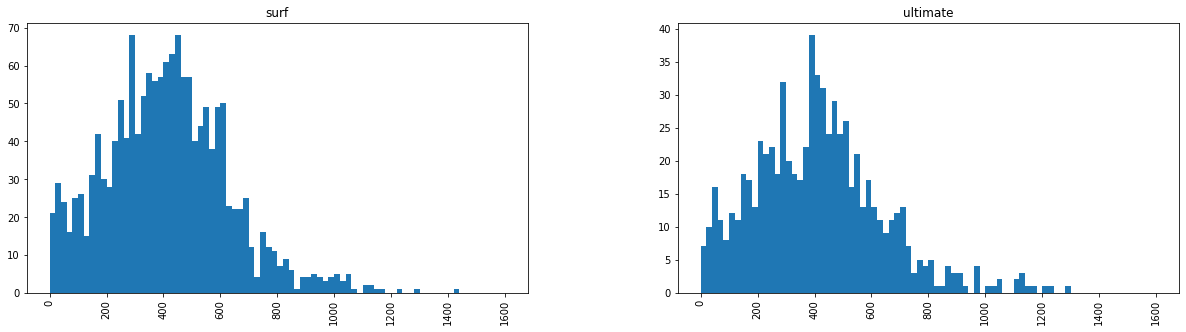

In [134]:
# Histogram for total call duration per month
hist_plot(df_merged, 'total_duration', 80, 1600)

Call duration histograms for both types of surf and ultimate data packets have a similar distribution and are both right skewed.

<function __main__.hist_plot(data, col, bins, upper_range)>

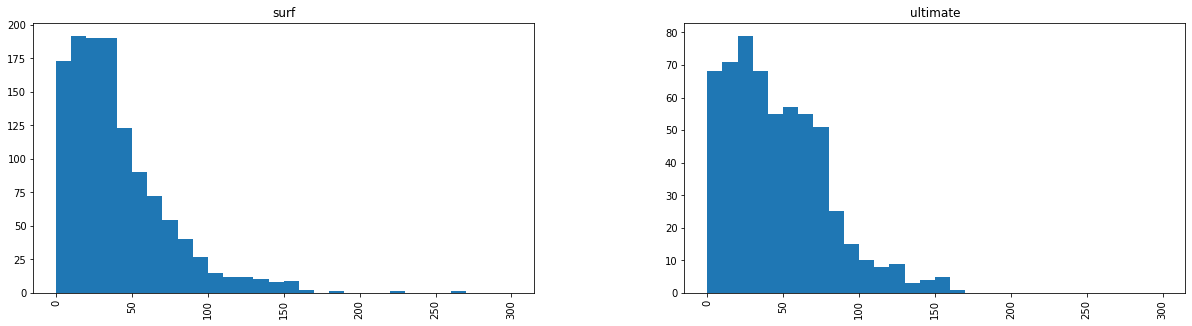

In [135]:
# Histogram for total SMS per month
hist_plot(df_merged, 'sms_count', 30, 300)

The total SMS histograms for both surf and ultimate data plans are right-skewed. On the surf histogram, the histogram peaks appear to be in the range 0–40, while on the ultimate histogram, the total SMS peak has wider range from 0-80.

<function __main__.hist_plot(data, col, bins, upper_range)>

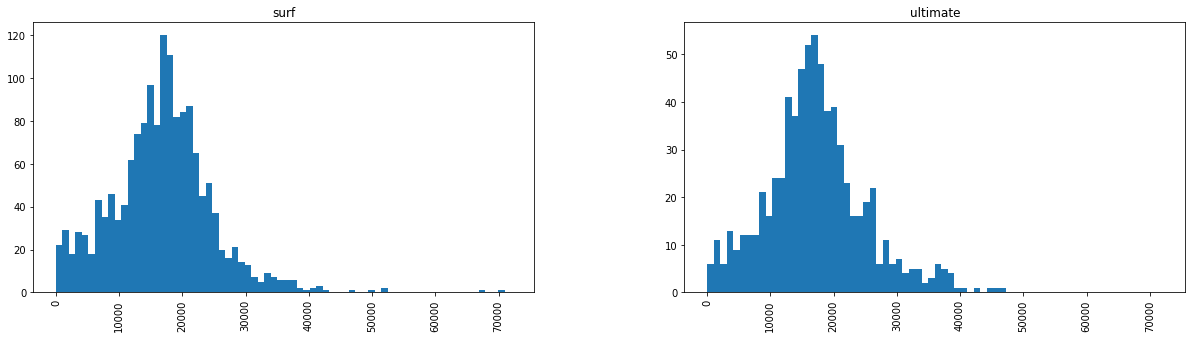

In [136]:
# Histogram for total data per month
hist_plot(df_merged, 'total_mb', 70, 72000)

The total data histogram (MB) for both types of surf and ultimate data packets is right-skewed.

<function __main__.hist_plot(data, col, bins, upper_range)>

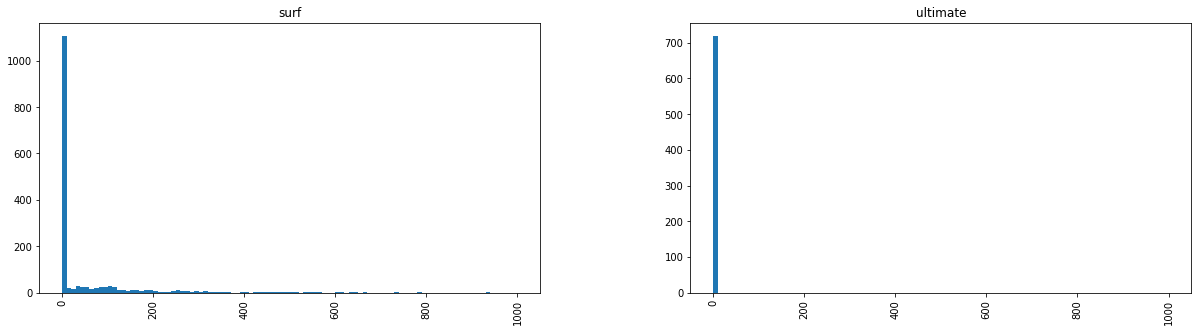

In [137]:
# Histogram for additional call duration per month
hist_plot(df_merged, 'add_duration', 100, 1000)

Both types of data packages are dominated by users who do not require additional call duration. The additional call duration is only visible on data-surf packages.

<function __main__.hist_plot(data, col, bins, upper_range)>

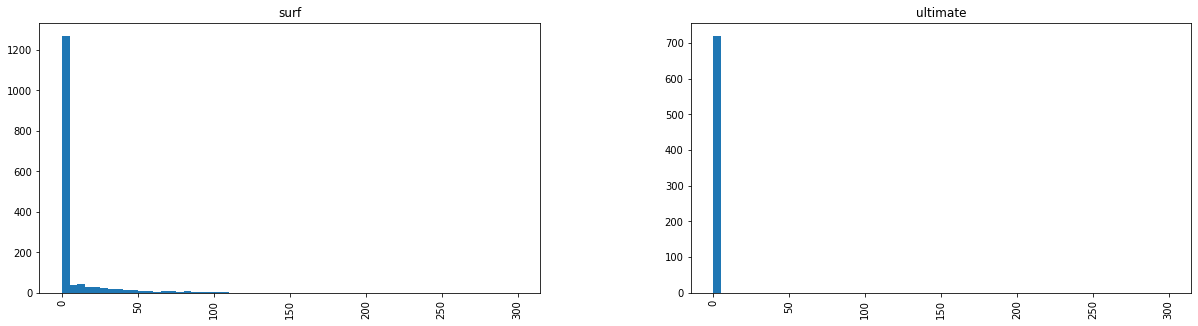

In [138]:
# Histogram for additional SMS per month
hist_plot(df_merged, 'add_sms', 60, 300)

Both plans are dominated by customers who do not use additional SMS. The additional SMS is only seen on Surf data plan.

<function __main__.hist_plot(data, col, bins, upper_range)>

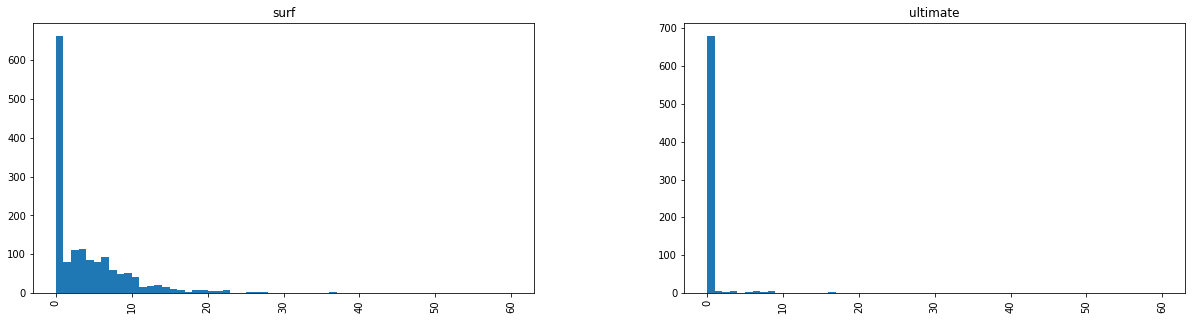

In [139]:
# Histogram for additional data (GB) per month
hist_plot(df_merged, 'add_gb', 60, 60)

Both plans are dominated by customers who do not use additional (GB) data. Additional data is more visible in Surf plan.

<function __main__.hist_plot(data, col, bins, upper_range)>

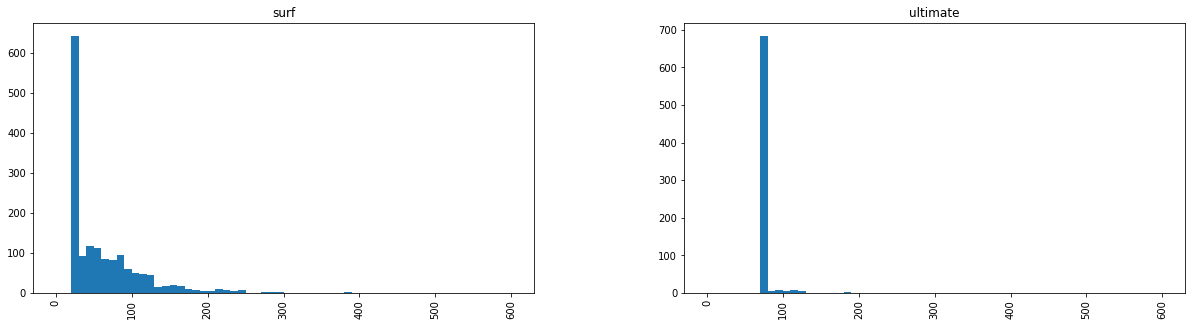

In [140]:
# Histogram for total revenue per month
hist_plot(df_merged, 'total_revenue', 60, 600)

Both plans have the highest total revenue from the monthly fees for the main package and are right-skewed. This can be clearly seen, especially in the Ultimate Plan. In addition, the distribution of additional data (GB) and total revenue for Surf plan were quite similar. This indicates that additional revenue is dominated by additional (GB) data.

## Hypothesis Testing

The hypothesis to be tested:
1. The average revenue from users of Ultimate and Surf plan is different.
2. The average revenue from users in the NY-NJ area is different from that of users from other regions.

Surf and Ultimate are two distinct and independent groups. Thus, two sample t-test or independent t-test method will be used for the hypothesis test.

Usually, the null or H0 hypothesis assumes that there is no significant difference in the means of the two groups. The alternative hypothesis (H1) is the opposite, which assumes that there is a difference in the means of the two groups and that this difference is unlikely to occur due to *sampling error* or *chance*.

For the hypothesis to be tested, then:
* H0: The average income of the ultimate and surf phone package users is the same.
* H1: The average income of users of ultimate and surf packages is different.

Similarly:
* H0: The average income of users in the NY-NJ area is the same as the income of users from other regions.
* H1: The average income of users in the NY-NJ area is different from the income of users from other regions.

The alpha value is defined as 0.05 or 5%. With this, we decided that we are willing to take a 5% risk in asserting that the unknown population averages for surf and ultimate package user income are not the same, even though they are.

In [141]:
# H0: The average income of Ultimate and Surf plan users is the same.
# H1: The average income of Ultimate and Surf plan users is different.

# Create a variable containing dataset that has been separated by plan type.
surf_revenue = df_merged.loc[df_merged['plan']=='surf']['total_revenue']
ulti_revenue = df_merged.loc[df_merged['plan']=='ultimate']['total_revenue']

# Sets the alpha value
alpha = 0.05

# Conduct t-test
results = st.ttest_ind(surf_revenue, ulti_revenue, equal_var=True)

# Calculate and display the p-value
print('p_value :', results.pvalue)

# Display the results
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 9.470478215100305e-09
H0 ditolak


We reject the null hypothesis (H0) which states that the average revenue of Surf and Ultimate plan users is the same and decide we have evidence that the mean income in the population is different for Ultimate and Surf plan users.

In [142]:
# H0: The average revenue from users in the NY-NJ area is the same as that of users from other regions.
# H1: The average revenue of users in the NY-NJ area is different from the revenue of users from other regions.

# Create a variable containing dataset that has been separated by region
ny_nj_revenue = df_merged[df_merged['state'].isin(['NY-NJ-PA'])]['total_revenue']
others_revenue = df_merged[~df_merged['state'].isin(['NY-NJ-PA'])]['total_revenue']

# Sets the alpha value
alpha = 0.05

# Conduct t-test
results = st.ttest_ind(ny_nj_revenue, others_revenue)

# Calculate and display the p-value
print('p_value :', results.pvalue)

# Display the results
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 0.04076784279879048
H0 ditolak


We reject the null hypothesis (H0) which states that the mean revenue of users from NY-NJ and users from other states are the same and decide we have evidence that the mean revenue in the population is different for users from NY-NJ with users from other states.

## Conclusion

During the data exploration, the following were found:
* There are a total of 500 customers in the dataset, 34 of them have stopped using the service.
* The youngest customer is 18 years old.
* The oldest customer is 75 years old.
* Data types `reg_date`, `call_data`, `message_date` and `session_date` are not suitable and need to be changed to datetime.
* There are zero values on call duration and internet data.

After fixing the date data type to datetime, several columns were added to calculate the number of calls, call duration, number of SMS, amount of data (MB), additional call duration, additional SMS, additional data (MB), additional revenue from each service, and total revenue from each user.

The analysis was performed by calculating the average, median, variance and standard deviation. Data visualization is done by making a histogram to see the distribution of data. From the analysis obtained:
* Average, median, variance and standard deviation values for call duration, number of SMS, amount of data used per month are similar to Surf and Ultimate plan types.
* There is an additional call duration on the Surf plan.
* There is an additional SMS in the Surf plan.
* There is no additional call duration on the Ultimate plan.
* There is no additional SMS on the Ultimate plan.
* There is additional data (MB) for both plans, but the amount is higher in Surf plan.
* The average additional income from the Surf plan is higher than that from the Ultimate plan.
* The average total revenue from the Ultimate plan is higher than that from the Surf plan.
 
Hypothesis testing using *two sample t-test* was carried out, and the following conclusions were obtained:
* There is a difference in the average user income of the Surf plan and the Ultimate plan.
* There are differences in the average income of users from the NY-NJ region and other areas.

The plan that brings more revenue is Ultimate. The Ultimate plan can be considered for advertising.